In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\megha\OneDrive\Desktop\data analytics\sockmarket crash analysis using python\cleaned_sensex.csv')

In [4]:
print(df.head())

         Date        Close         High          Low         Open  Volume
0  1997-07-01  4300.859863  4301.770020  4247.660156  4263.109863       0
1  1997-07-02  4333.899902  4395.310059  4295.399902  4302.959961       0
2  1997-07-03  4323.459961  4393.290039  4299.970215  4335.790039       0
3  1997-07-04  4323.819824  4347.589844  4300.580078  4332.700195       0
4  1997-07-07  4291.450195  4391.009766  4289.490234  4326.810059       0


#### Let’s convert the ‘Date’ column to datetime, sort the data by date, and set it as the DataFrame index:

In [7]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df=df.sort_values('Date')
    df.set_index('Date', inplace=True)
    
print("\nDataFrame after processing the Date column:")    
print(df.head())    


DataFrame after processing the Date column:
                  Close         High          Low         Open  Volume
Date                                                                  
1997-07-01  4300.859863  4301.770020  4247.660156  4263.109863       0
1997-07-02  4333.899902  4395.310059  4295.399902  4302.959961       0
1997-07-03  4323.459961  4393.290039  4299.970215  4335.790039       0
1997-07-04  4323.819824  4347.589844  4300.580078  4332.700195       0
1997-07-07  4291.450195  4391.009766  4289.490234  4326.810059       0


In [8]:
df['Daily_Return'] = df['Close'].pct_change()* 100

crash_threshold_daily=-5
df['crash_daily']=df['Daily_Return'] < crash_threshold_daily
print(df.head())

                  Close         High          Low         Open  Volume  \
Date                                                                     
1997-07-01  4300.859863  4301.770020  4247.660156  4263.109863       0   
1997-07-02  4333.899902  4395.310059  4295.399902  4302.959961       0   
1997-07-03  4323.459961  4393.290039  4299.970215  4335.790039       0   
1997-07-04  4323.819824  4347.589844  4300.580078  4332.700195       0   
1997-07-07  4291.450195  4391.009766  4289.490234  4326.810059       0   

            Daily_Return  crash_daily  
Date                                   
1997-07-01           NaN        False  
1997-07-02      0.768219        False  
1997-07-03     -0.240890        False  
1997-07-04      0.008324        False  
1997-07-07     -0.748635        False  


#### The code first calculates the daily percentage change in the ‘Close’ column using the pct_change() function. It then multiplies the result by 100 to convert the changes into percentages. The resulting values are stored in a new column called ‘Daily_Return’. Next, the code defines a threshold of -5% to identify significant daily drops. These drops are flagged as potential crash events for further analysis.

#### The code then creates a boolean column named ‘Crash_Daily’ to flag extreme daily declines. It marks a day as True if the daily return is less than or equal to -5%. Otherwise, it marks the day as False. This step helps quickly identify days with significant market drops.

## Highliting daily crashes at sensex closing price in graphical representation

In [9]:
!pip install matplotlib
!pip install seaborn
!pip install plotly



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


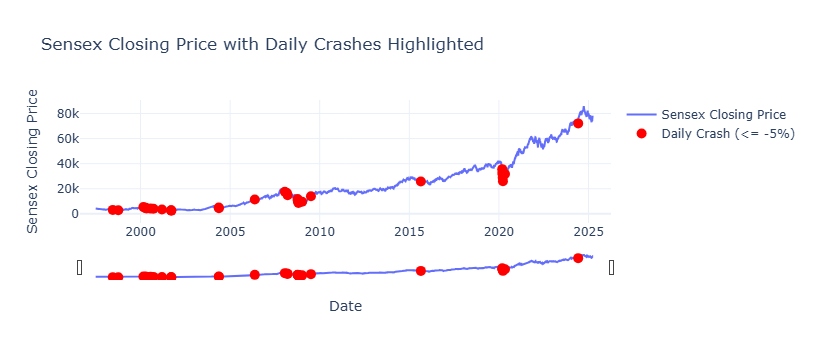

In [10]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Sensex Closing Price'))

crash_days=df.index[df['crash_daily']]
crash_closes=df['Close'] [df['crash_daily']]

fig.add_trace(go.Scatter(x=crash_days, y=crash_closes, mode='markers', marker=dict(color='red', size=10) , name=f'Daily Crash (<= {crash_threshold_daily}%)'))

fig.update_layout(title='Sensex Closing Price with Daily Crashes Highlighted',
                  xaxis_title='Date',
                  yaxis_title='Sensex Closing Price',
                  xaxis_rangeslider_visible=True,
                    template='plotly_white')

fig.show()

#### The data shows that major crashes often occur during global or domestic economic crises like the 2008 meltdown and COVID-19 in 2020. These crashes usually happen suddenly and sharply, breaking long-term upward trends.

# Analyzing Drawdowns

#### calculating the cumulative maximum and drawdown (percentage drop from the cumulative maximum):

In [11]:
df['cummulative_max']=df['Close'].cummax()
df['drawdown'] = (df['Close'] - df['cummulative_max']) / df['cummulative_max'] * 100
drawdown_threshold=-20

#### The above code first calculates the cumulative maximum of the ‘Close’ prices using the cummax() function. This tracks the highest closing price reached up to each point in time. It then computes the drawdown by subtracting the cumulative maximum from the current closing price. After that, it divides the result by the cumulative maximum and converts it into a percentage.

#### This gives a measure of how far the current price is below its historical peak, indicating the severity of any decline.

#### Now, let’s have a look at the market drawdown over time and highlight a specific drawdown threshold:

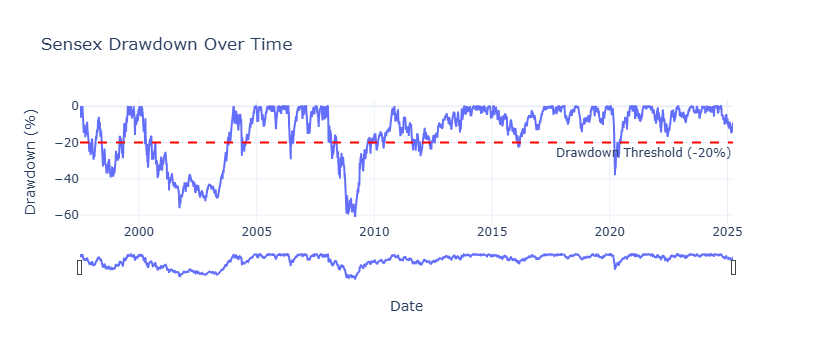

In [12]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['drawdown'], mode='lines', name='Drawdown(%)'))
fig.add_hline(y=drawdown_threshold, line=dict(color='red', dash='dash'), annotation_text=f'Drawdown Threshold ({drawdown_threshold}%)',annotation_position='bottom right')
fig.update_layout(title='Sensex Drawdown Over Time',
                  xaxis_title='Date',
                  yaxis_title='Drawdown (%)',
                  xaxis_rangeslider_visible=True,
                  template='plotly_white')
fig.show()


#### So, the major crashes are clearly visible around 2000, 2008–2009, and 2020, where drawdowns exceeded -50%, indicating severe market stress. These deep troughs correspond to global financial crises and the pandemic.

#### Next, let’s identify the dates where the market drawdown exceeded the -20% threshold 

In [13]:
crash_drawdowns= df[df['drawdown'] <= drawdown_threshold]
print("\nCrashes with Drawdown <= -20%:")
print(crash_drawdowns[['Close','cummulative_max', 'drawdown']])
print("\nTotal number of crashes with Drawdown <= -20%:", len(crash_drawdowns))
print("\nTotal number of daily crashes:", df['crash_daily'].sum())


Crashes with Drawdown <= -20%:
                   Close  cummulative_max   drawdown
Date                                                
1997-11-12   3633.179932      4548.020020 -20.115129
1997-11-13   3554.100098      4548.020020 -21.853904
1997-11-14   3569.770020      4548.020020 -21.509360
1997-11-17   3578.100098      4548.020020 -21.326202
1997-11-18   3518.899902      4548.020020 -22.627871
...                  ...              ...        ...
2020-05-29  32424.099609     41952.628906 -22.712592
2020-06-01  33303.519531     41952.628906 -20.616370
2020-06-11  33538.371094     41952.628906 -20.056569
2020-06-15  33228.800781     41952.628906 -20.794473
2020-06-17  33507.921875     41952.628906 -20.129149

[1747 rows x 3 columns]

Total number of crashes with Drawdown <= -20%: 1747

Total number of daily crashes: 34


#### Here, we filtered the DataFrame to select rows where the ‘Drawdown’ value is less than or equal to the defined threshold (-20%). It then prints a subset of columns: ‘Close’, ‘Cumulative_Max’, and ‘Drawdown’, for these filtered dates, after dropping any missing values.

## Analyzing Periods of Crashes

#### We will now further zoom into these periods of crashes for a more detailed analysis to compare patterns across different crash events.

#### let’s identify contiguous periods (clusters) where the drawdown is below the threshold:

In [14]:
crash_dates=df.index[df['drawdown'] <= drawdown_threshold]
clusters=[]
current_cluster=[]

for date in crash_dates:
    if not current_cluster:
        current_cluster.append(date)
    else:
        if (date - current_cluster[-1]).days <= 3:
            current_cluster.append(date)
        else:
            clusters.append(current_cluster)
            current_cluster = [date]
if current_cluster:
    clusters.append(current_cluster)

print("\nClusters of Crashes with Drawdown <= -20%:")
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx+1}: {cluster[0].date()} to {cluster[-1].date()} (Total {len(cluster)} days)")
print("\nTotal number of clusters with Drawdown <= -20%:", len(clusters))
                        


Clusters of Crashes with Drawdown <= -20%:
Cluster 1: 1997-11-12 to 1997-12-26 (Total 31 days)
Cluster 2: 1997-12-30 to 1997-12-30 (Total 1 days)
Cluster 3: 1998-01-08 to 1998-01-23 (Total 12 days)
Cluster 4: 1998-01-27 to 1998-01-29 (Total 3 days)
Cluster 5: 1998-02-02 to 1998-02-27 (Total 19 days)
Cluster 6: 1998-06-02 to 1998-09-30 (Total 86 days)
Cluster 7: 1998-10-05 to 1998-12-24 (Total 56 days)
Cluster 8: 1998-12-28 to 1998-12-31 (Total 4 days)
Cluster 9: 1999-01-04 to 1999-03-04 (Total 40 days)
Cluster 10: 1999-03-26 to 1999-03-26 (Total 1 days)
Cluster 11: 1999-04-05 to 1999-04-29 (Total 18 days)
Cluster 12: 1999-05-03 to 1999-05-05 (Total 3 days)
Cluster 13: 2000-04-04 to 2000-04-04 (Total 1 days)
Cluster 14: 2000-04-18 to 2000-04-20 (Total 3 days)
Cluster 15: 2000-04-24 to 2000-04-28 (Total 5 days)
Cluster 16: 2000-05-02 to 2000-06-15 (Total 33 days)
Cluster 17: 2000-06-21 to 2000-06-28 (Total 5 days)
Cluster 18: 2000-07-18 to 2000-08-31 (Total 32 days)
Cluster 19: 2000-09-

#### This code is designed to group dates with large drawdowns (≥ 20%) into clusters — specifically, if the drawdown dates occur within 3 days of each other, they're considered part of the same "crash cluster".
#### It then prints:The start and end dates of each cluster,How many days each cluster spans,The total number of such clusters.

#### This part starts by extracting the dates when the drawdown exceeds the defined threshold (i.e. when the drawdown is less than or equal to -20%). It then iterates over these dates to group them into clusters. A new cluster is started when there is a gap of more than three days between consecutive crash dates (to account for weekends or holidays). Each cluster represents a contiguous period of market stress, and the code finally prints the start and end dates of each cluster along with the total number of days in that cluster.

#### Let’s zoom into the first crash cluster and visualize the closing price, daily returns, and drawdown within a 30-day window before and after the cluster:


First cluster starts on 1997-11-12 and ends on 1997-12-26.


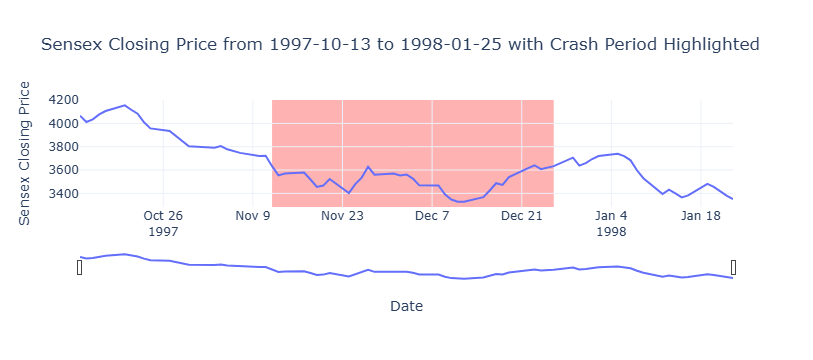

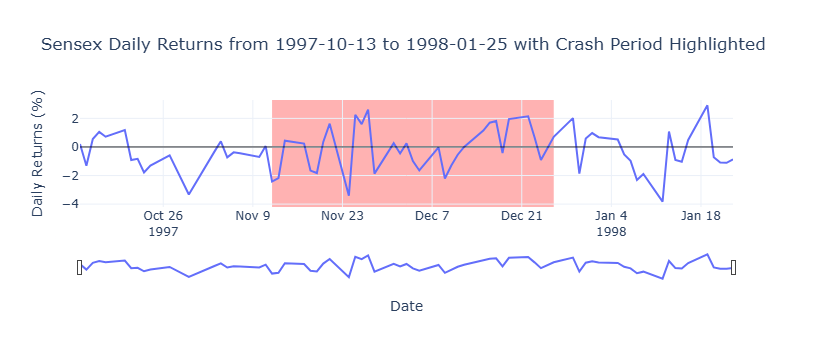

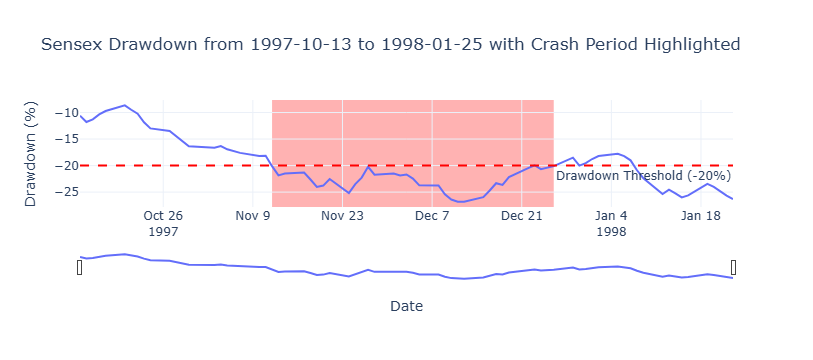

In [15]:
if clusters:
    cluster_start= clusters[0][0]
    cluster_end = clusters[0][-1]
    print(f"\nFirst cluster starts on {cluster_start.date()} and ends on {cluster_end.date()}.")
    
    zoom_start = cluster_start - pd.Timedelta(days=30)
    zoom_end = cluster_end + pd.Timedelta(days=30)
    zoom_df= df.loc[zoom_start:zoom_end]
    zoom_fig = go.Figure()
    
    fig_close=go.Figure()
    fig_close.add_trace(go.Scatter(x=zoom_df.index, y=zoom_df['Close'], mode='lines', name='Sensex Closing Price'))
    fig_close.add_vrect(x0=cluster_start, x1=cluster_end, fillcolor='red', opacity=0.3, layer='below', line_width=0, name='Crash Period')
    fig_close.update_layout(
        title=f'Sensex Closing Price from {zoom_start.date()} to {zoom_end.date()} with Crash Period Highlighted',
        xaxis_title='Date',
        yaxis_title='Sensex Closing Price',
        xaxis_rangeslider_visible=True,
        template='plotly_white'    
    )
    fig_close.show()
    
    fig_returns = go.Figure()
    fig_returns.add_trace(go.Scatter(x=zoom_df.index, y=zoom_df['Daily_Return'], mode='lines', name='Daily Returns (%)'))
    fig_returns.add_hline(y=0,line_color='black',line_width=0.8)
    fig_returns.add_vrect(x0=cluster_start, x1=cluster_end, fillcolor='red', opacity=0.3, layer='below', line_width=0, name='Crash Period')
    fig_returns.update_layout(
        title=f'Sensex Daily Returns from {zoom_start.date()} to {zoom_end.date()} with Crash Period Highlighted',
        xaxis_title='Date',
        yaxis_title='Daily Returns (%)',
        xaxis_rangeslider_visible=True,
        template='plotly_white'
    )
    fig_returns.show()
    
    fig_drawdown = go.Figure()
    fig_drawdown.add_trace(go.Scatter(x=zoom_df.index, y=zoom_df['drawdown'], mode='lines', name='Drawdown (%)'))
    fig_drawdown.add_hline(y=drawdown_threshold, line=dict(color='red', dash='dash'), annotation_text=f'Drawdown Threshold ({drawdown_threshold}%)',annotation_position='bottom right')
    fig_drawdown.add_vrect(x0=cluster_start, x1=cluster_end, fillcolor='red', opacity=0.3, layer='below', line_width=0, name='Crash Period')
    fig_drawdown.update_layout(
        title=f'Sensex Drawdown from {zoom_start.date()} to {zoom_end.date()} with Crash Period Highlighted',
        xaxis_title='Date',
        yaxis_title='Drawdown (%)',
        xaxis_rangeslider_visible=True,
        template='plotly_white'
    )
    fig_drawdown.show()
else:
    print("\nNo clusters of crashes with Drawdown <= -20% found.")
    
    

#### The closing price chart shows a clear downward trend as the market moves from above 4000 to the mid-3000 range. 

#### The daily returns chart captures short-term volatility, oscillating around zero and reflecting larger negative spikes during the crash period.

#### Finally, the drawdown chart reveals how far the index has fallen from its previous peak, crossing below the -20% threshold in the red-shaded region and signalling a significant market decline.

#### let’s define specific crash periods and create functions to visualize the closing prices and daily returns for these periods with a 30-day zoom window:

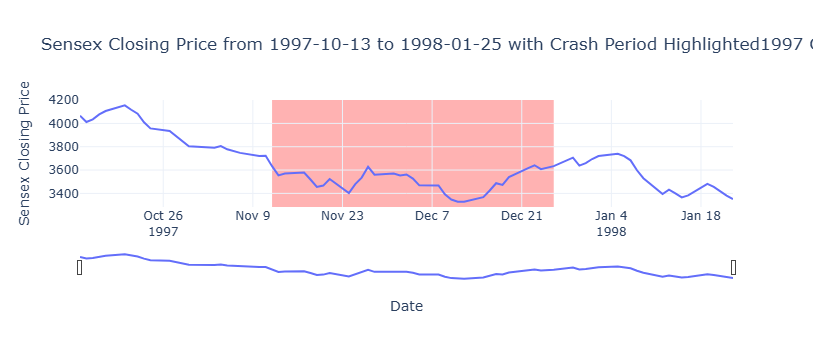

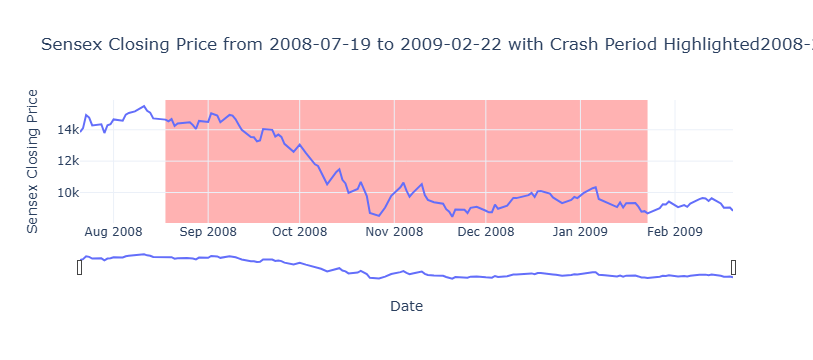

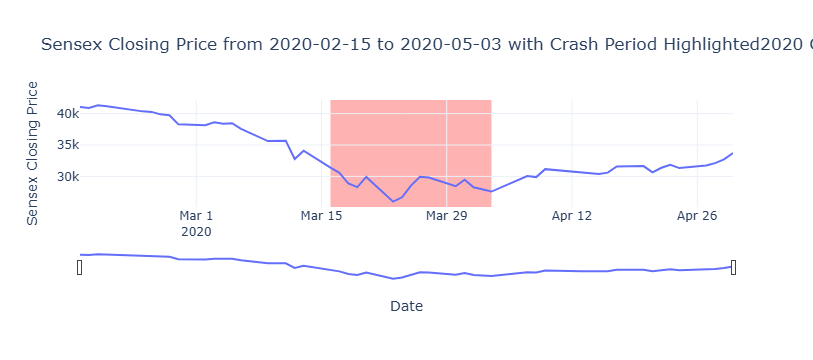

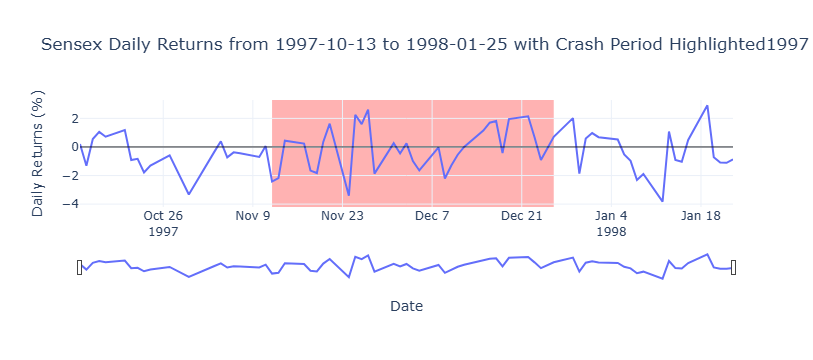

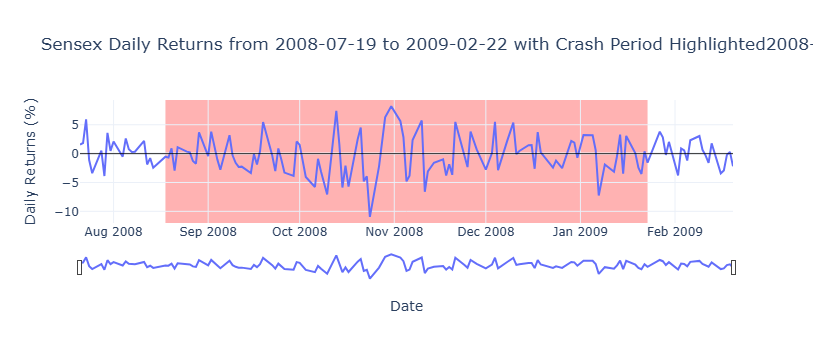

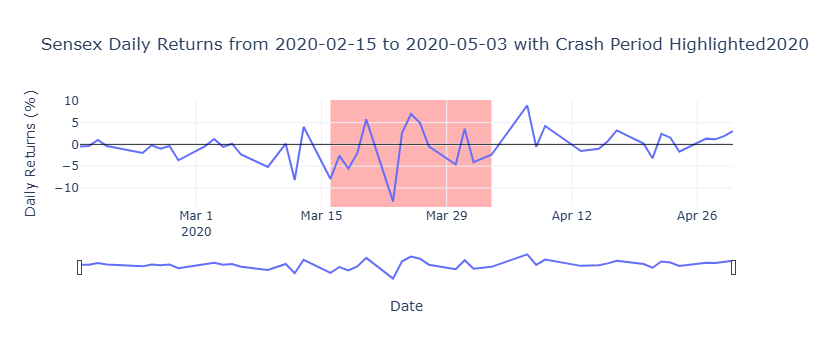

In [16]:
cluster1_start=pd.to_datetime("1997-11-12")
cluster1_end=pd.to_datetime("1997-12-26")

cluster49_start=pd.to_datetime("2008-08-18")
cluster49_end=pd.to_datetime("2009-01-23")

cluster79_start=pd.to_datetime("2020-03-16")
cluster79_end=pd.to_datetime("2020-04-03")

def plot_crash_period(cluster_start, cluster_end, title_suffix=" "):
    zoom_start = cluster_start - pd.Timedelta(days=30)
    zoom_end = cluster_end + pd.Timedelta(days=30)
    zoom_df = df.loc[zoom_start:zoom_end]
    
    fig_close = go.Figure()
    fig_close.add_trace(go.Scatter(x=zoom_df.index, y=zoom_df['Close'], mode='lines', name='Sensex Closing Price'))
    fig_close.add_vrect(x0=cluster_start, x1=cluster_end, fillcolor='red', opacity=0.3, layer='below', line_width=0, name='Crash Period')
    fig_close.update_layout(
        title=f'Sensex Closing Price from {zoom_start.date()} to {zoom_end.date()} with Crash Period Highlighted{title_suffix}',
        xaxis_title='Date',
        yaxis_title='Sensex Closing Price',
        xaxis_rangeslider_visible=True,
        template='plotly_white'
    )
    fig_close.show()

def plot_daily_returns(cluster_start, cluster_end, title_suffix=" "):
    zoom_start = cluster_start - pd.Timedelta(days=30)
    zoom_end = cluster_end + pd.Timedelta(days=30)
    zoom_df = df.loc[zoom_start:zoom_end]
    
    fig_returns = go.Figure()
    fig_returns.add_trace(go.Scatter(x=zoom_df.index, y=zoom_df['Daily_Return'], mode='lines', name='Daily Returns (%)'))
    fig_returns.add_hline(y=0, line_color='black', line_width=0.8)
    fig_returns.add_vrect(x0=cluster_start, x1=cluster_end, fillcolor='red', opacity=0.3, layer='below', line_width=0, name='Crash Period')
    fig_returns.update_layout(
        title=f'Sensex Daily Returns from {zoom_start.date()} to {zoom_end.date()} with Crash Period Highlighted{title_suffix}',
        xaxis_title='Date',
        yaxis_title='Daily Returns (%)',
        xaxis_rangeslider_visible=True,
        template='plotly_white'
    )
    
    fig_returns.show()
    
#plot for each crash period
plot_crash_period(cluster1_start, cluster1_end, "1997 Crash")
plot_crash_period(cluster49_start, cluster49_end, "2008-2009 Crash")
plot_crash_period(cluster79_start, cluster79_end, "2020 Crash")

#plot daily returns for each crash period
plot_daily_returns(cluster1_start, cluster1_end, "1997 Crash")
plot_daily_returns(cluster49_start, cluster49_end, "2008-2009 Crash")
plot_daily_returns(cluster79_start, cluster79_end, "2020 Crash")


## Developing Early Warning Signals

#### Let’s build an early warning system (EWS) based on some common pre-crash indicators. In our historical analysis, we observed that before major downturns:

#### The daily returns tend to show persistent declines.
#### The volatility (i.e., the rolling standard deviation of returns) tends to increase.

#### From historical observations, we can set thresholds

#### If the 10-day moving average return falls below -0.5%, The 10-day volatility exceeds, say, 2%,

#### We’ll assume that we have a dataset for 2025 (here, we’ll simulate a synthetic dataset for 2025 based on our historical performance). We’ll apply our EWS to this data to see if any warning conditions are met.

In [17]:
np.random.seed(42)

dates_2025= pd.date_range(start='2025-01-01', periods=250)

daily_returns=np.zeros(250)
daily_returns[:150] = np.random.normal(loc=0.0005, scale=0.01, size=150)  # Normal returns
daily_returns[150:200] = np.random.normal(loc=-0.008, scale=0.02, size=50)  # Crash period
daily_returns[200:] = np.random.normal(loc=0.0005, scale=0.01, size=50)  # Recovery period

prices=[30000]  # Starting price
for ret in  daily_returns:
    prices.append(prices[-1] * (1 + ret))
prices=prices[1:]  # Remove the initial price

df_2025 = pd.DataFrame({
    'Date': dates_2025,
    'Close': prices,
    'Daily_Return': daily_returns * 100  # Convert to percentage
})

df_2025.set_index('Date', inplace=True)
print("\nSimulated Sensex Data for 2025:")
print(df_2025.head())


Simulated Sensex Data for 2025:
                   Close  Daily_Return
Date                                  
2025-01-01  30164.014246      0.546714
2025-01-02  30137.390190     -0.088264
2025-01-03  30347.655307      0.697689
2025-01-04  30825.032985      1.573030
2025-01-05  30768.267647     -0.184153


#### This section begins by setting a random seed to ensure consistent synthetic data across runs. It then generates a date range for 2025 using business days, assuming 250 trading days in total. The code creates synthetic daily returns to reflect different market conditions. The first 150 days simulate normal behavior with a slight positive drift and low volatility. Days 151–200 reflect pre-crash conditions with a negative drift and higher volatility. Days 201–250 shift back to normal market behavior.

#### Starting with an initial closing price of 30,000, the code calculates the synthetic closing prices by compounding these returns over time. Finally, the data is assembled into a Pandas DataFrame with the ‘Date’ column set as the index, ready for further analysis.

####  compute the 10-day rolling average return and rolling volatility for the synthetic 2025 data, and then define and identify early warning signals based on these metrics:

In [18]:
df_2025['Rolling_Mean_Return']= df_2025['Daily_Return'].rolling(window=20).mean()
df_2025['Rolling_Volatility'] = df_2025['Daily_Return'].rolling(window=20).std() # Annualized volatility

warning_condition = (df_2025['Rolling_Mean_Return'] < -0.5) & (df_2025['Rolling_Volatility'] > 2.0)
df_2025['Warning'] = warning_condition
print("\nSimulated Sensex Data with Rolling Mean Return and Volatility:")
print(df_2025.head())

warnings_df=df_2025[df_2025['Warning']]
print("Early Warning Signals for 2025:")
print(warnings_df[['Close', 'Daily_Return', 'Rolling_Mean_Return', 'Rolling_Volatility']].head())


Simulated Sensex Data with Rolling Mean Return and Volatility:
                   Close  Daily_Return  Rolling_Mean_Return  \
Date                                                          
2025-01-01  30164.014246      0.546714                  NaN   
2025-01-02  30137.390190     -0.088264                  NaN   
2025-01-03  30347.655307      0.697689                  NaN   
2025-01-04  30825.032985      1.573030                  NaN   
2025-01-05  30768.267647     -0.184153                  NaN   

            Rolling_Volatility  Warning  
Date                                     
2025-01-01                 NaN    False  
2025-01-02                 NaN    False  
2025-01-03                 NaN    False  
2025-01-04                 NaN    False  
2025-01-05                 NaN    False  
Early Warning Signals for 2025:
                   Close  Daily_Return  Rolling_Mean_Return  \
Date                                                          
2025-07-16  21417.993849     -2.567715    

####  calculated two key rolling metrics over a 10-day window for the synthetic 2025 dataset: the average daily return (Rolling_Mean_Return) and the volatility (standard deviation of daily returns, Rolling_Volatility). We then defined an early warning condition to flag periods when the 10-day rolling average return falls below -0.5% and volatility rises above 2%. These conditions create a new boolean column, ‘Warning’, which indicates when the warning criteria are met.

#### Filtered and found the first 15 instances from the DataFrame where an early warning signal occurs, showing the relevant metrics (closing price, daily return, rolling mean return, and rolling volatility).

#### Let’s have a look at the synthetic 2025 Sensex closing price and mark the early warning signals:

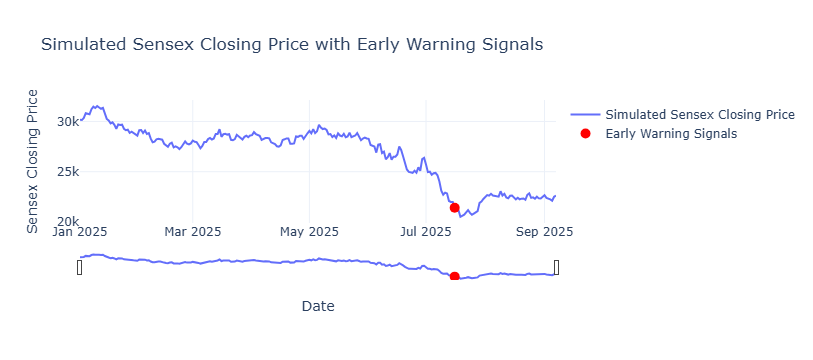

In [19]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=df_2025.index, y=df_2025['Close'], mode='lines', name='Simulated Sensex Closing Price'))

warning_dates=df_2025.index[df_2025['Warning']]
warning_closes=df_2025['Close'][df_2025['Warning']]

fig.add_trace(go.Scatter(x=warning_dates, y=warning_closes, mode='markers', marker=dict(color='red', size=10), name='Early Warning Signals'))
fig.update_layout(title='Simulated Sensex Closing Price with Early Warning Signals',
                  xaxis_title='Date',
                  yaxis_title='Sensex Closing Price',
                  xaxis_rangeslider_visible=True,
                  template='plotly_white')
fig.show()


####  Early warning signals, marked in red, appear shortly before and during the crash, suggesting potential predictive indicators of market stress. The market starts the year strong but gradually weakens, with the crash accelerating after a series of warning signals. This simulated scenario demonstrates the value of early detection tools in identifying the onset of a crash, enabling investors or systems to potentially act before severe losses occur.

## Summary

#### From this analysis :

#### Identifying market crashes using daily percentage changes and drawdown methods.
#### Grouping consecutive days of market stress into distinct crash clusters.
#### Visualizing and comparing different crash periods to uncover unique market behaviours.
#### Developing an early warning system using rolling statistics of returns and volatility.